In [1]:
%cd ../

/home/users/dmoreno2016/VisionTransformers


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

os.environ["PATH"] = "/home/users/dmoreno2016/.TinyTeX/bin/x86_64-linux:" + os.environ["PATH"]

plt.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

In [3]:
from src.data.LitData import LitData
from scripts.utils import load_yaml

path_save_results = 'images'

In [4]:
config = load_yaml('./configs/online/run_config.yaml')['ft_classification']
config['loader']['fold'] = 0
config['debug'] = False
config['loader']['use_png'] = False

## ELAsTiCC dataset

In [5]:
config['loader']['spc'] = None

dataset = LitData(
    name_dataset='elasticc_1',
    **config
    )

dataset.prepare_data()

In [6]:
dataset.setup(stage='test')

In [7]:
snid_to_search = '74091873'
snid_to_search = '30768739'
#snid_to_search = '73928600'
snid_to_search = '41820707'


for idx, (snid, _, label) in enumerate(dataset.test_dataset.dataset):
    if snid == snid_to_search:
        print(f'ID: {snid} | label: {dataset.inv_mapping_classes[label]} | idx: {idx}')
        break

ID: 41820707 | label: PISN | idx: 10509


In [8]:
best_elasticc_1_params = {
    'overlay': {
        'markersize': 2.0,
        'linewidth': 0.5,
        'use_err': True,
        'input_type': 'overlay',
        #'lr': 5e-06
    },
    '6grid': {
        'markersize': 5.0,
        'linewidth': 2.0,
        'use_err': True,
        'input_type': '6grid',
        #'lr': 5e-06
    },
}

elasticc_imgs = {
    'overlay': None,
    '6grid': None,
}

length = len(dataset.test_dataset)

for key, best_parms in best_elasticc_1_params.items():
    print(f'Looking for {key} approach')

    dataset.test_dataset.config['imgs_params']['fig_params']['markersize'] = best_parms['markersize']
    dataset.test_dataset.config['imgs_params']['fig_params']['linewidth'] = best_parms['linewidth']
    dataset.test_dataset.config['imgs_params']['use_err'] = best_parms['use_err']
    dataset.test_dataset.config['imgs_params']['input_type'] = best_parms['input_type']

    snid, obj_df, label = dataset.test_dataset.dataset[idx]
    image = dataset.test_dataset.create_image(obj_df)

    elasticc_imgs[key] = image.numpy()

Looking for overlay approach
Looking for 6grid approach


## MACHO single band

In [9]:
config['loader']['spc'] = 'all'

macho_dataset = LitData(
    name_dataset='macho',
    **config
    )

macho_dataset.prepare_data()

In [10]:
macho_dataset.setup(stage='test')

In [11]:
snid_to_search = '22.5115.3360'
snid_to_search = '2.5146.11'
#snid_to_search = '7.7906.22'
snid_to_search = '24.3466.13'

for idx, (snid, _, label) in enumerate(macho_dataset.test_dataset.dataset):
    if snid == snid_to_search:
        print(f'ID: {snid} | label: {macho_dataset.inv_mapping_classes[label]} | idx: {idx}')
        break

ID: 24.3466.13 | label: LPV | idx: 254


In [12]:
best_macho_params = {
    'overlay': {
        'markersize': 1.0,
        'linewidth': 2.0,
        'use_err': True,
        'input_type': 'overlay',
        #'lr': 5e-06
    }
}

macho_imgs = {
    'overlay': None,
}

length = len(macho_dataset.test_dataset)

for key, best_parms in best_macho_params.items():
    print(f'Looking for {key} approach')

    macho_dataset.test_dataset.config['imgs_params']['fig_params']['markersize'] = best_parms['markersize']
    macho_dataset.test_dataset.config['imgs_params']['fig_params']['linewidth'] = best_parms['linewidth']
    macho_dataset.test_dataset.config['imgs_params']['use_err'] = best_parms['use_err']
    macho_dataset.test_dataset.config['imgs_params']['input_type'] = best_parms['input_type']

    snid, obj_df, label = macho_dataset.test_dataset.dataset[idx]
    image = macho_dataset.test_dataset.create_image(obj_df)

    macho_imgs[key] = image.numpy()

Looking for overlay approach


## MACHO multiband

In [13]:
config['loader']['spc'] = 'all'

macho_mb_dataset = LitData(
    name_dataset='macho_multiband',
    **config
    )

macho_mb_dataset.prepare_data()

In [14]:
macho_mb_dataset.setup(stage='test')

In [15]:
#snid_to_search = '22.5115.3360'
#snid_to_search = '2.5146.11'
#snid_to_search = '7.7906.22'

for idx, (snid, _, label) in enumerate(macho_mb_dataset.test_dataset.dataset):
    if snid == snid_to_search:
        print(f'ID: {snid} | label: {macho_mb_dataset.inv_mapping_classes[label]} | idx: {idx}')
        break

ID: 24.3466.13 | label: LPV | idx: 254


In [16]:
best_macho_mb_params = {
    'overlay': {
        'markersize': 1.0,
        'linewidth': 2.0,
        'use_err': True,
        'input_type': 'overlay',
        #'lr': 5e-06
    },
    '2grid': {
        'markersize': 3.0,
        'linewidth': 1.5,
        'use_err': True,
        'input_type': '2grid',
        #'lr': 5e-06
    },
}

macho_mb_imgs = {
    'overlay': None,
    '2grid': None,
}


length = len(macho_mb_dataset.test_dataset)

for key, best_parms in best_macho_mb_params.items():
    print(f'Looking for {key} approach')

    macho_mb_dataset.test_dataset.config['imgs_params']['fig_params']['markersize'] = best_parms['markersize']
    macho_mb_dataset.test_dataset.config['imgs_params']['fig_params']['linewidth'] = best_parms['linewidth']
    macho_mb_dataset.test_dataset.config['imgs_params']['use_err'] = best_parms['use_err']
    macho_mb_dataset.test_dataset.config['imgs_params']['input_type'] = best_parms['input_type']

    snid, obj_df, label = macho_mb_dataset.test_dataset.dataset[idx]
    image = macho_mb_dataset.test_dataset.create_image(obj_df)

    macho_mb_imgs[key] = image.numpy()

Looking for overlay approach
Looking for 2grid approach


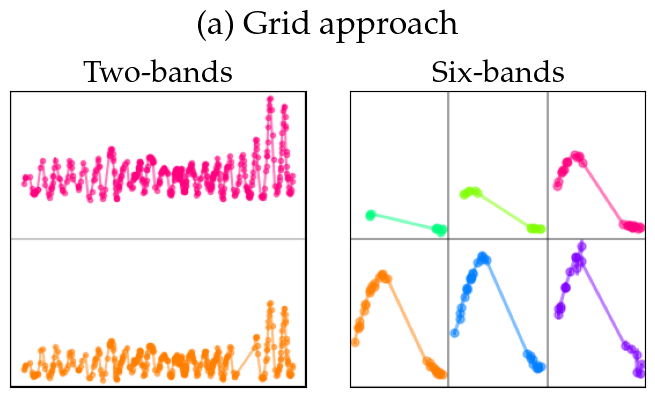

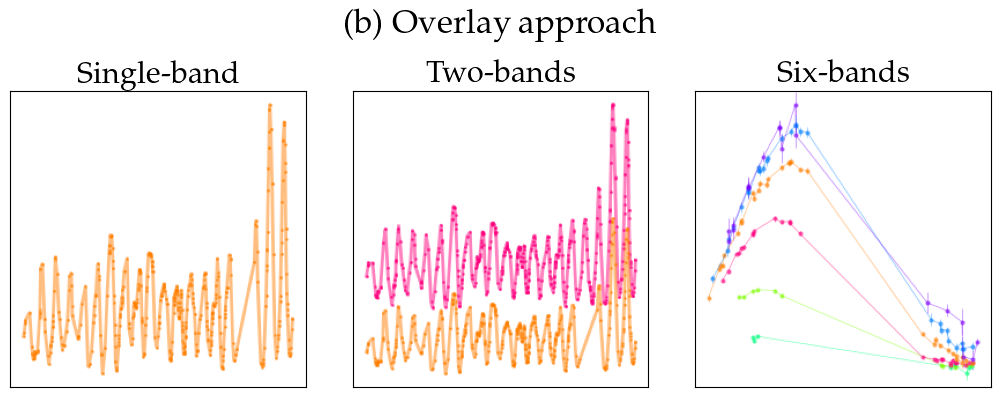

In [17]:
fs = 22

# Crear la figura para la primera fila (Grid approach)
fig1, axs1 = plt.subplots(1, 2, figsize=(8, 4))

# Agregar imágenes en la primera fila (Grid approach)
axs1[0].imshow(macho_mb_imgs['2grid'])  # Two-bands
axs1[0].set_title("Two-bands", size=fs)

axs1[1].imshow(elasticc_imgs['6grid'])  # Six-bands
axs1[1].set_title("Six-bands", size=fs)

# Ajustar etiquetas
fig1.suptitle("(a) Grid approach", fontsize=fs + 2, fontweight='bold')

# Eliminar ejes
for ax in axs1:
    ax.set_xticks([])
    ax.set_yticks([])

fig1.subplots_adjust(wspace=-0.5)
# Mostrar la figura de Grid approach
plt.tight_layout(rect=[0, 0, 1, 1.01])
os.makedirs(path_save_results, exist_ok=True)
plt.savefig(f"{path_save_results}/input_model_a.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Crear la figura para la segunda fila (Overlay approach)
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# Agregar imágenes en la segunda fila (Overlay approach)
axs2[0].imshow(macho_imgs['overlay'])  # Single-band
axs2[0].set_title("Single-band", size=fs)

axs2[1].imshow(macho_mb_imgs['overlay'])  # Two-bands
axs2[1].set_title("Two-bands", size=fs)

axs2[2].imshow(elasticc_imgs['overlay'])  # Six-bands
axs2[2].set_title("Six-bands", size=fs)

# Ajustar etiquetas
fig2.suptitle("(b) Overlay approach", fontsize=fs + 2, fontweight='bold')

# Eliminar ejes
for ax in axs2:
    ax.set_xticks([])
    ax.set_yticks([])

  # Reduce espacio horizontal en Grid approach
fig2.subplots_adjust(wspace=-0.5)

# Mostrar la figura de Overlay approach
plt.tight_layout(rect=[0, 0, 1, 1.01])
os.makedirs(path_save_results, exist_ok=True)
plt.savefig(f"{path_save_results}/input_model_b.pdf", format='pdf', bbox_inches='tight')
plt.show()
